**Amin fathi - 400722102**

## **Import libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import cv2 as cv
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Activation, Input, Flatten, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

## **Download the dataset**

Download and extract the dataset from the below link in a folder.

https://drive.google.com/file/d/1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P/view?usp=sharing

In [ ]:
!gdown --id 1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P

Downloading...
From: https://drive.google.com/uc?id=1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P
To: /content/dataset.zip
100% 65.7M/65.7M [00:00<00:00, 102MB/s]


In [ ]:
!unzip dataset

Archive:  dataset.zip
replace no/no0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: All
  inflating: no/no0.jpg              
  inflating: no/no1.jpg              
  inflating: no/no10.jpg             
  inflating: no/no100.jpg            
  inflating: no/no1000.jpg           
  inflating: no/no1001.jpg           
  inflating: no/no1002.jpg           
  inflating: no/no1003.jpg           
  inflating: no/no1004.jpg           
  inflating: no/no1005.jpg           
  inflating: no/no1006.jpg           
  inflating: no/no1007.jpg           
  inflating: no/no1008.jpg           
  inflating: no/no1009.jpg           
  inflating: no/no101.jpg            
  inflating: no/no1010.jpg           
  inflating: no/no1011.jpg           
  inflating: no/no1012.jpg           
  inflating: no/no1013.jpg           
  inflating: no/no1014.jpg           
  inflating: no/no1015.jpg           
  inflating: no/no1016.jpg           
  inflating: no/no1017.jpg           
  inflating: no/no1018.jpg           
  in

## **Read image files from directory**

To be familiar with keras dataset loading and preprocessing you can use the below link:

https://keras.io/api/preprocessing/image/

Please set ***validation_split = 0.2***

In [ ]:
Val_Dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory = '/content/datasets',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=1,
    subset='validation',
    validation_split=0.2,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False 
)


train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    directory = '/content/datasets',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=1,
    validation_split=0.2,
    subset='training',
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False 
)

Found 3000 files belonging to 2 classes.
Using 600 files for validation.
Found 3000 files belonging to 2 classes.
Using 2400 files for training.


## **Display the dataset**

Plot some samples from the dataset to see and know what are you working with. 

In [ ]:
print(type(train_ds))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [ ]:
for data, labels in train_ds.take(1):
    print(data.shape)
    print(labels.shape)

(32, 256, 256, 3)
(32,)


In [ ]:
data_augmentation = keras.Sequential(
    [
    ]
)

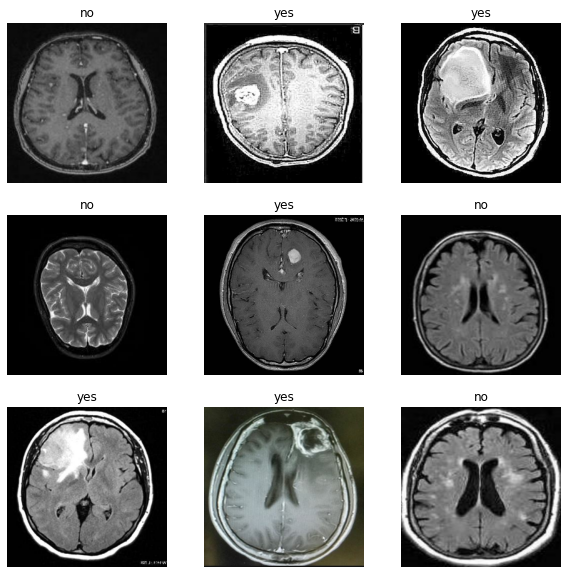

In [ ]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## **Build the models**

In this section you will build the model with two approaches. 
First you should build it with the Sequential API and then you have to work with the Functional API in the second part. 

You can use the below link to know more about these two APIs.

Keep the architecture as simple as possible.

https://medium.com/analytics-vidhya/keras-model-sequential-api-vs-functional-api-fc1439a6fb10

## **1.Sequential API**

### **Build a model**

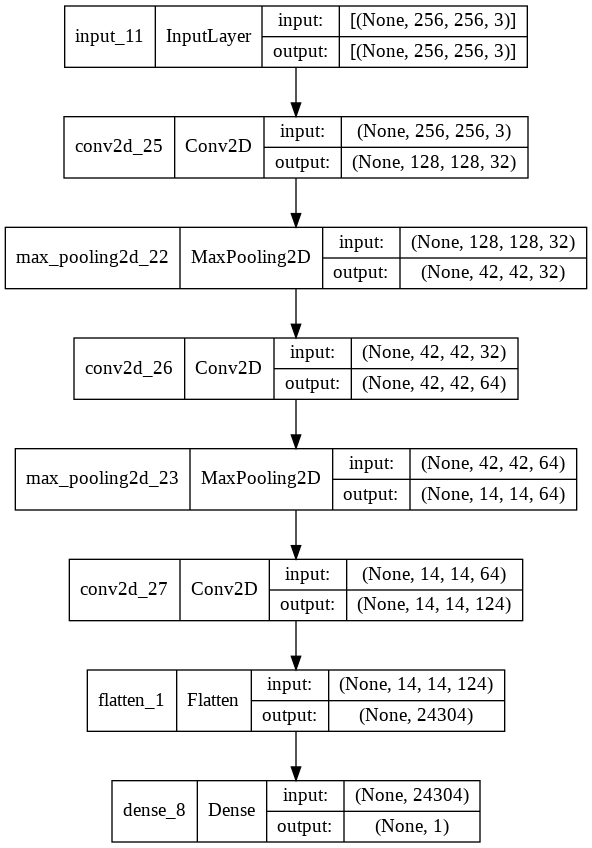

In [ ]:

seq_model = Sequential()
seq_model.add(Input(shape=(256, 256)+(3,)))
seq_model.add(Conv2D(32, 3, strides=2, padding="same", activation = "relu"))
seq_model.add(MaxPool2D(3))
seq_model.add(Conv2D(64, 3, padding="same", activation = "relu"))
seq_model.add(MaxPool2D(3))
seq_model.add(Conv2D(124, 3, padding="same", activation = "relu"))
seq_model.add(Flatten())
    
seq_model.add(Dense(units = 1, activation="sigmoid"))

keras.utils.plot_model(seq_model, show_shapes=True)

### **Train the model**

In [ ]:
epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
seq_model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history2 = seq_model.fit(
    train_ds, epochs=epochs, callbacks=callbacks,validation_data=Val_Dataset
)

Epoch 1/20
75/75 [==============================] - 8s 96ms/step - loss: 3.5577 - accuracy: 0.7500 - val_loss: 0.3806 - val_accuracy: 0.8200
Epoch 2/20
75/75 [==============================] - 7s 85ms/step - loss: 0.3409 - accuracy: 0.8492 - val_loss: 0.3756 - val_accuracy: 0.8233
Epoch 3/20
75/75 [==============================] - 7s 84ms/step - loss: 0.1839 - accuracy: 0.9258 - val_loss: 0.2109 - val_accuracy: 0.9317
Epoch 4/20
75/75 [==============================] - 7s 84ms/step - loss: 0.1072 - accuracy: 0.9633 - val_loss: 0.1759 - val_accuracy: 0.9383
Epoch 5/20
75/75 [==============================] - 7s 84ms/step - loss: 0.0579 - accuracy: 0.9862 - val_loss: 0.2000 - val_accuracy: 0.9383
Epoch 6/20
75/75 [==============================] - 7s 84ms/step - loss: 0.0360 - accuracy: 0.9925 - val_loss: 0.1929 - val_accuracy: 0.9500
Epoch 7/20
75/75 [==============================] - 7s 93ms/step - loss: 0.0345 - accuracy: 0.9908 - val_loss: 0.1659 - val_accuracy: 0.9517
Epoch 8/20
75

### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

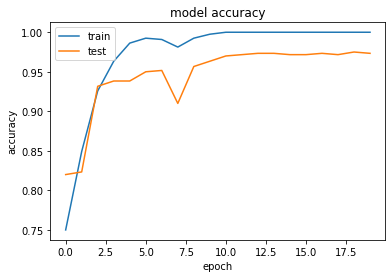

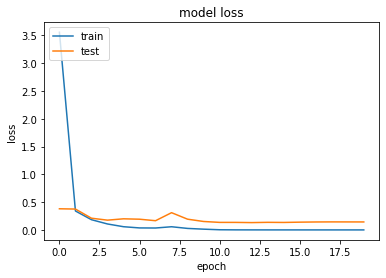

In [ ]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **2.Functional API**

### **Build a model**

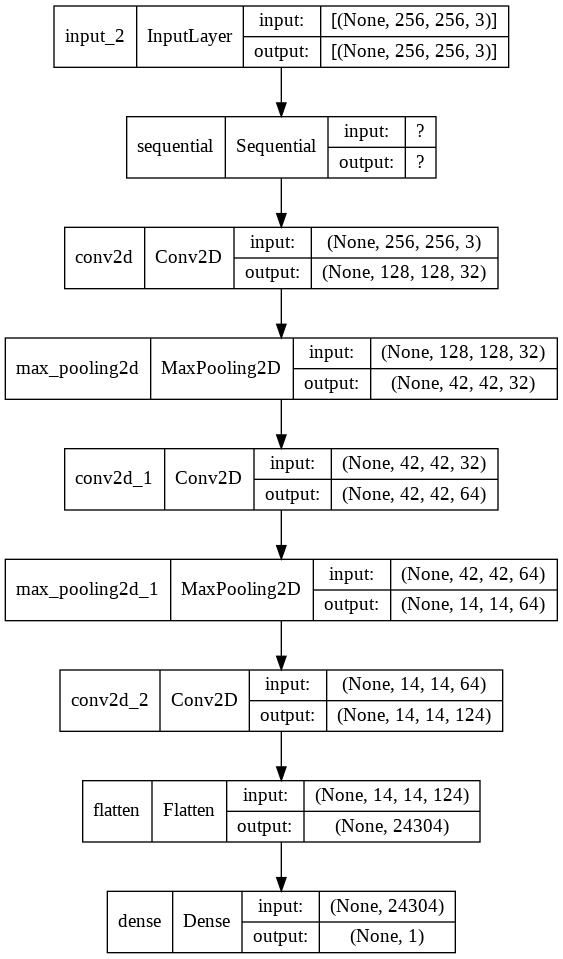

In [ ]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)
    #seq_model.add(Input(shape=(256, 256)+(3,)))

    # Entry block

    x = layers.Conv2D(32, 3, strides=2, padding="same", activation = "relu")(x)
    x = layers.MaxPool2D(3)(x)
    x = layers.Conv2D(64, 3, padding="same", activation = "relu")(x)
    x = layers.MaxPool2D(3)(x)
    x = layers.Conv2D(124, 3, padding="same", activation = "relu")(x)
    x = layers.Flatten()(x)


    outputs = layers.Dense(units = 1, activation="sigmoid")(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=(256, 256) + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

### **Train the model**

In [ ]:
epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(
    train_ds, epochs=epochs, callbacks=callbacks,validation_data=Val_Dataset
)

Epoch 1/20
75/75 [==============================] - 9s 91ms/step - loss: 3.5330 - accuracy: 0.7487 - val_loss: 0.3586 - val_accuracy: 0.8233
Epoch 2/20
75/75 [==============================] - 7s 86ms/step - loss: 0.2599 - accuracy: 0.8896 - val_loss: 0.2437 - val_accuracy: 0.9067
Epoch 3/20
75/75 [==============================] - 7s 86ms/step - loss: 0.1777 - accuracy: 0.9362 - val_loss: 0.2022 - val_accuracy: 0.9300
Epoch 4/20
75/75 [==============================] - 7s 84ms/step - loss: 0.1104 - accuracy: 0.9621 - val_loss: 0.1657 - val_accuracy: 0.9433
Epoch 5/20
75/75 [==============================] - 7s 83ms/step - loss: 0.0787 - accuracy: 0.9737 - val_loss: 0.1363 - val_accuracy: 0.9500
Epoch 6/20
75/75 [==============================] - 7s 83ms/step - loss: 0.0409 - accuracy: 0.9900 - val_loss: 0.1098 - val_accuracy: 0.9550
Epoch 7/20
75/75 [==============================] - 7s 85ms/step - loss: 0.0214 - accuracy: 0.9958 - val_loss: 0.1166 - val_accuracy: 0.9567
Epoch 8/20
75

### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

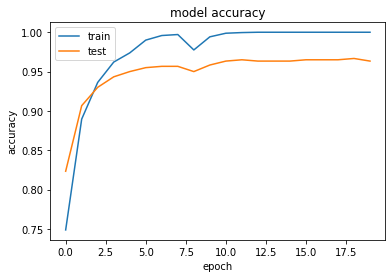

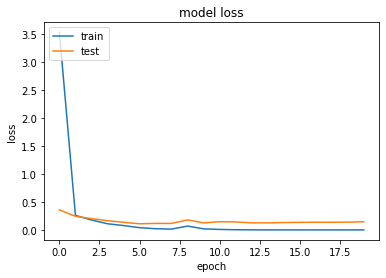

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()